In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


# Market Analysis of Offering Preferential Time Deposit Rates
## Problem Statement

The objective of this study is to conduct a comprehensive market analysis of individuals who are interested in obtaining better TD (Time Deposit) rates in order to assess the potential market share for such offerings. The main focus will be on processing BPI and competitor time deposit rates data. Through data analysis, the aim is to create a projection table that estimates the number of clients interested in specific TD rates (Y rate) to better understand the demand for these products. Additionally, if feasible, we will explore and identify the characteristics of clients who are more likely to seek preferential TD rates, such as their location, demographics, and financial behaviors. The findings from this research will enable BPI to tailor their offerings and marketing strategies to cater to the needs of its customers.

## Data Understanding

In [2]:
pdic = pd.read_excel("PDIC_DDD_202112.xlsx")

In [3]:
pdic.head() ## Observe the columns and initial rows of the dataset

,AREA,No. of Banking Offices,TOTAL DEPOSITS_Account,TOTAL DEPOSITS_Amount,DEMAND DEPOSITS_Account,DEMAND DEPOSITS_Amount,SAVINGS DEPOSITS_Account,SAVINGS DEPOSITS_Amount,TIME DEPOSITS_Account,TIME DEPOSITS_Amount,FCDU DEPOSITS_Account,FCDU DEPOSITS_Amount
0,NATIONAL CAPITAL REGION (NCR),"3,754","38,197,197","10,522,685,136","2,012,443","2,765,699,829","34,670,813","3,791,073,061","447,409","2,113,855,517","1,066,532","1,852,056,729"
1,NCR,"3,754","38,197,197","10,522,685,136","2,012,443","2,765,699,829","34,670,813","3,791,073,061","447,409","2,113,855,517","1,066,532","1,852,056,729"
2,Metro Manila,"3,754","38,197,197","10,522,685,136","2,012,443","2,765,699,829","34,670,813","3,791,073,061","447,409","2,113,855,517","1,066,532","1,852,056,729"
3,City of Caloocan,132,"572,554","227,562,697","58,735","72,459,331","477,448","89,265,168","14,091","40,258,448","22,280","25,579,750"
4,Other Barangays,132,"572,554","227,562,697","58,735","72,459,331","477,448","89,265,168","14,091","40,258,448","22,280","25,579,750"


In [4]:
pdic.shape 

(546, 12)

In [5]:
pdic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AREA                      546 non-null    object
 1   No. of Banking Offices    546 non-null    object
 2   TOTAL DEPOSITS_Account    546 non-null    object
 3   TOTAL DEPOSITS_Amount     546 non-null    object
 4   DEMAND DEPOSITS_Account   546 non-null    object
 5   DEMAND DEPOSITS_Amount    546 non-null    object
 6   SAVINGS DEPOSITS_Account  546 non-null    object
 7   SAVINGS DEPOSITS_Amount   546 non-null    object
 8   TIME DEPOSITS_Account     546 non-null    object
 9   TIME DEPOSITS_Amount      546 non-null    object
 10  FCDU DEPOSITS_Account     546 non-null    object
 11  FCDU DEPOSITS_Amount      546 non-null    object
dtypes: object(12)
memory usage: 51.3+ KB


<br>
The dataset has 546 rows and 12 columns. Initial analysis of the first few rows indicate that every column beyond the first column have entries with an integer data type. However, the info function indicates that the dtype of each column is 'object'.
<br> 


In [6]:
for colname in pdic.columns:
    pdic[colname] = pdic[colname].apply(lambda x: str(x).replace(u'\xa0', u'')) ## Removing '\xa0' from format
    pdic[colname] = pdic[colname].apply(lambda x: str(x).replace(u',', u'')) ## Reformatting the string for ease in data type conversion from string to int

pdic = pdic.astype('int64', errors = 'ignore') ## Changing columns to integers

In [7]:
pdic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AREA                      546 non-null    object
 1   No. of Banking Offices    546 non-null    int64 
 2   TOTAL DEPOSITS_Account    546 non-null    int64 
 3   TOTAL DEPOSITS_Amount     546 non-null    int64 
 4   DEMAND DEPOSITS_Account   546 non-null    object
 5   DEMAND DEPOSITS_Amount    546 non-null    object
 6   SAVINGS DEPOSITS_Account  546 non-null    int64 
 7   SAVINGS DEPOSITS_Amount   546 non-null    int64 
 8   TIME DEPOSITS_Account     546 non-null    object
 9   TIME DEPOSITS_Amount      546 non-null    object
 10  FCDU DEPOSITS_Account     546 non-null    object
 11  FCDU DEPOSITS_Amount      546 non-null    object
dtypes: int64(5), object(7)
memory usage: 51.3+ KB


In [8]:

for colname in ['DEMAND DEPOSITS_Amount', 'SAVINGS DEPOSITS_Amount', 'TIME DEPOSITS_Amount']:
    print(pdic[pdic['AREA'].str.contains("Region")][colname].astype("int64").sum() + int(pdic[colname][0]))

4513895714
6375215785
2566283407


In [9]:
pdic.iloc[1,5]

'2765699829'

In [10]:
colname = 'TOTAL DEPOSITS_Amount'
pdic[pdic['AREA'].str.contains("Region")][colname].astype("int64").sum() + int(pdic[colname][0])

15793118491

## Handling NA values
After observing the remaining columns whose dtype stayed as "object", several of the entries remained as **"-"**. It can be understood that this was a placeholder for null values. Identifying the rows with null values can give insight as to how these entries will be dealt with.

In [11]:
pdic_nan = pdic.replace('-', np.nan) ## Replace "-" entries with NA values
pdic_nan[pdic_nan.isnull().any(axis=1)] ## Obtaining all rows with a null entry

,AREA,No. of Banking Offices,TOTAL DEPOSITS_Account,TOTAL DEPOSITS_Amount,DEMAND DEPOSITS_Account,DEMAND DEPOSITS_Amount,SAVINGS DEPOSITS_Account,SAVINGS DEPOSITS_Amount,TIME DEPOSITS_Account,TIME DEPOSITS_Amount,FCDU DEPOSITS_Account,FCDU DEPOSITS_Amount
186,Rosario,10,10779,646271,272,46795,10197,418086,310,181389,NaN,NaN
224,Other Cities/Municipalities,13,18374,858783,608,52196,17521,672729,245,133858,NaN,NaN
348,Naujan,10,4037,134576,NaN,NaN,3974,112578,63,21998,NaN,NaN
366,Labo,10,80840,1908163,2860,1042359,77902,846187,NaN,NaN,78,19617
367,Other Cities/Municipalities,18,14631,447275,247,4404,14249,380485,135,62386,NaN,NaN
387,Other Cities/Municipalities,10,15060,501105,125,22447,14425,343243,510,135416,NaN,NaN
390,Other Cities/Municipalities,27,58049,1571891,2197,703730,55724,812912,128,55249,NaN,NaN
393,Other Cities/Municipalities,26,13490,510209,61,13035,13396,476993,33,20181,NaN,NaN
449,Other Cities/Municipalities,12,1385,118653,19,94212,1359,21414,7,3028,NaN,NaN
483,Other Cities/Municipalities,16,51066,1690448,426,79765,50422,1437913,218,172770,NaN,NaN


In [12]:
pdic = pdic[-pdic_nan.isnull().any(axis=1)]
#pdic = pdic.astype('int64', errors = 'ignore')

**Note:** Because there are only 15 rows with null entries, we will attempt to remove them from the data set and work from there.
<br>
From here on, the data set will only contain rows without NULL entries.

In [13]:
pdic.iloc[:,4][0]

'2012443'

## Excel stuff

In [14]:
TD_Rates = pd.read_excel("BPI CW1.xlsx", sheet_name = 1)
DLA_Share = pd.read_excel("BPI CW1.xlsx", sheet_name = 2)
DLA_Region = pd.read_excel("BPI CW1.xlsx", sheet_name = 3)
Market_Share = pd.read_excel("BPI CW1.xlsx", sheet_name = 4)
Deposit_Ranges = pd.read_excel("BPI CW1.xlsx", sheet_name = 5)

In [15]:
pd.options.display.float_format = '{:20,.4f}'.format

In [16]:
TD_Rates.head()

,Company,Rate,Length in Days,Minimum,Maximum
0,BPI,0.1875,180,5000,50000
1,BPI,0.1875,180,50000,250000
2,BPI,0.1875,180,250000,1000000
3,BPI,0.1875,180,1000000,5000000
4,BPI,0.2500,180,5000000,up wards


In [17]:
DLA_Share.head()

,Company,Year,Demand (in mil),Savings (in mil),Time (in mil),Total
0,BDO,2021,"404,568.0000","2,000,245.0000","416,083.0000",2820896
1,BDO,2020,"314,256.0000","1,810,164.0000","485,731.0000",2610151
2,BDO,2019,"485,731.0000","1,589,639.0000","662,594.0000",2737964
3,BDO,2018,"179,944.0000","1,505,680.0000","734,341.0000",2419965
4,BDO,2017,"134,931.0000","1,409,256.0000","576,825.0000",2121012


In [18]:
DLA_Region = DLA_Region.iloc[:,:6]
DLA_Region.head()

,Year,Region,Demand,Savings,Time,Total
0,"2,022.0000",National Capital Region,"2,912,412.1470","5,115,954.0740","3,462,328.9550","11,490,695.1800"
1,"2,022.0000",Region I (Ilocos Region),"106,151.0810","215,019.6111","28,838.4727","350,009.1647"
2,"2,022.0000",Region II (Cagayan Valley),"85,621.0225","99,066.2002","17,484.2654","202,171.4880"
3,"2,022.0000",Region III (Central Luzon),"283,914.6037","552,633.4915","113,524.7016","950,072.7968"
4,"2,022.0000",Region IV-A (CALABARZON),"363,628.4214","777,827.1807","144,097.8523","1,285,553.4540"


In [19]:
Deposit_Ranges.head()

,Company,Range,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Total,"P5,000 - P50,000 (agg.)","230,113.0000","211,784.0000","191,434.0000","168,026.0000","148,426.0000","146,669.0000","113,025.0000","87,229.0000","119,777.0000","121,564.0000","131,016.0000"
1,Total,"P50,000 - P250,000 (agg.)","450,384.0000","397,338.0000","376,334.0000","344,220.0000","307,979.0000","287,617.0000","309,526.0000","301,037.0000","276,829.0000","269,037.0000","262,847.0000"
2,Total,"P250,000 - P1,000,000 (agg.)","363,289.0000","347,954.0000","357,625.0000","353,287.0000","344,310.0000","345,715.0000","344,343.0000","341,661.0000","331,102.0000","287,894.0000","280,733.0000"
3,Total,"P1,000,000 - P5,000,000 (agg.)","163,431.0000","200,712.0000","210,840.0000","217,851.0000","218,857.0000","232,732.0000","178,959.0000","204,267.0000","157,588.0000","162,227.0000","179,851.0000"
4,Total,"Over P5,000,000",NaN,NaN,NaN,NaN,NaN,NaN,"107,158.0000","100,052.0000","74,563.0000","75,350.0000","104,603.0000"


In [20]:
DLA_Region[DLA_Region["Year"] == 2021]

,Year,Region,Demand,Savings,Time,Total
17,"2,021.0000",National Capital Region,"2,858,509.7330","4,810,905.0790","2,780,661.7680","10,450,076.5800"
18,"2,021.0000",Region I (Ilocos Region),"96,743.1162","189,441.1913","27,281.7301","313,466.0375"
19,"2,021.0000",Region II (Cagayan Valley),"72,626.6516","96,036.9866","14,964.4671","183,628.1053"
20,"2,021.0000",Region III (Central Luzon),"253,686.5927","517,732.1584","95,437.0084","866,855.7594"
21,"2,021.0000",Region IV-A (CALABARZON),"308,092.8775","726,578.1181","127,549.0289","1,162,220.0240"
22,"2,021.0000",Region IV-B (MIMAROPA),"46,892.5141","58,731.0063","4,871.1127","110,494.6331"
23,"2,021.0000",Region V (Bicol Region),"81,126.6930","112,383.7993","15,388.5808","208,899.0731"
24,"2,021.0000",Region VI (Western Visayas),"159,176.0256","237,958.0741","44,940.4152","442,074.5149"
25,"2,021.0000",Region VII (Central Visayas),"270,340.1786","405,060.9432","93,618.0950","769,019.2168"
26,"2,021.0000",Region VIII (Eastern Visayas),"78,951.6793","70,935.8487","9,396.0111","159,283.5391"


In [21]:
DLA_Total = pd.DataFrame(columns = DLA_Share.columns)
for year in range(2012, 2022):
    DLA_Total.loc[-1] = ['All companies', year] + list(DLA_Region[DLA_Region["Year"] == year].iloc[:,2:].sum())
    DLA_Total.index = DLA_Total.index + 1
    DLA_Total.sort_index()
DLA_Total.reindex(index=DLA_Total.index[::-1])
#DLA_Total.loc[-1] = [2022, 'Philippines'] + list(DLA_Region[DLA_Region["Year"] == 2022].iloc[:,2:].sum())

    

,Company,Year,Demand (in mil),Savings (in mil),Time (in mil),Total
0,All companies,2021,"4,802,170.6512","7,874,537.4743","3,317,010.7921","15,993,718.9170"
1,All companies,2020,"4,082,890.3968","7,188,536.4344","3,382,835.6104","14,654,262.4419"
2,All companies,2019,"3,379,501.0065","6,172,694.6875","3,838,966.9544","13,391,162.6483"
3,All companies,2018,"2,921,301.8095","6,008,452.3185","3,572,105.2469","12,501,859.3748"
4,All companies,2017,"2,696,299.4857","5,556,328.2588","3,256,580.3804","11,509,208.1249"
5,All companies,2016,"2,266,121.6371","5,124,555.5763","2,808,309.6431","10,198,986.8568"
6,All companies,2015,"1,980,169.3096","4,404,211.0652","2,522,634.2922","8,907,014.6670"
7,All companies,2014,"1,746,200.9539","3,999,641.1921","2,604,190.5623","8,350,032.7084"
8,All companies,2013,"1,585,546.0765","3,543,086.2201","2,334,787.1957","7,463,419.4922"
9,All companies,2012,"1,144,680.7090","2,773,416.0790","1,718,818.1920","5,636,914.9800"


In [22]:
Company_list = list(TD_Rates['Company'].unique())

Market_Share_pc = pd.DataFrame(columns = ['Company', 'Year', 'Demand (in %)', 'Savings (in %)', 'Time (in %)'])
for company_name in DLA_Share['Company'].unique():
    for index, year in enumerate(range(2021,2011,-1)):
        try:
            Market_Share_pc.loc[-1] = [company_name, year] + list(map(lambda x: round(x, 2), DLA_Share[DLA_Share["Company"] == company_name].iloc[index,2:-1]*100/DLA_Total[DLA_Total["Year"] == year].iloc[0,2:-1]))
            Market_Share_pc.index = Market_Share_pc.index + 1
            Market_Share_pc.sort_index() 
        except:
            continue
#year = 2021
#index = 0
#["BDO", year] + list(DLA_Share[DLA_Share["Company"] == "BDO"].iloc[0,2:-1]*100/DLA_Total[DLA_Total["Year"] == 2021].iloc[:,2:-1])
Market_Share_pc

,Company,Year,Demand (in %),Savings (in %),Time (in %)
40,BDO,2021,8.4200,25.4000,12.5400
39,BDO,2020,7.7000,25.1800,14.3600
38,BDO,2019,14.3700,25.7500,17.2600
37,BDO,2018,6.1600,25.0600,20.5600
36,BDO,2017,5.0000,25.3600,17.7100
35,BDO,2016,5.0400,24.7400,18.6200
34,BDO,2015,5.2600,23.4700,20.8600
33,BDO,2014,4.9100,21.8300,20.4900
32,BDO,2013,5.0200,19.6200,24.4300
31,BDO,2012,4.2800,19.5900,19.7400


In [23]:
Market_Share_pc.to_csv('Market Share.csv')

In [3]:
Deposit_Ranges.head()

NameError: name 'Deposit_Ranges' is not defined

In [25]:
Deposit_Ranges[Deposit_Ranges["Range"] == "P5,000 - P50,000 (agg.)"].iloc[1,2:]

2012         4,655,185.9900
2013         6,622,485.6800
2014         4,265,149.5200
2015         3,499,981.5800
2016         3,056,091.3400
2017         2,948,046.9000
2018         2,457,163.5000
2019         1,679,158.2500
2020         1,619,385.0400
2021         1,582,763.2800
2022                    NaN
Name: 5, dtype: object

C:\Users\wallr\AppData\Local\Temp\ipykernel_2508\3400039763.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax1 = plt.plot(years, y1, 'r', label = 'Best Fit Line 1', color='green')


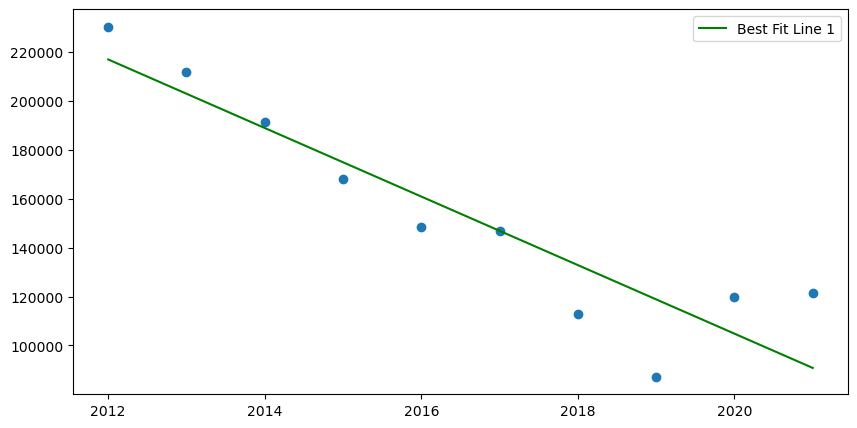

In [27]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats

range_col = Deposit_Ranges['Range'].unique()
Company_col = Deposit_Ranges['Company'].unique()
## Change the index to change the deposit range
index = 0
## 0 - P5,000 - P50,0000
## 1 - P50,000 - P250,000
## 2 - P250,000 - P1,000,000
## 3 - P1,000,000 - P5,000,000


years = [year for year in range(2012,2022)]
Total = Deposit_Ranges[Deposit_Ranges["Range"] == range_col[index]].iloc[0,2:-1]
BDO = Deposit_Ranges[Deposit_Ranges["Range"] == range_col[index]].iloc[1,2:-1]
BPI = Deposit_Ranges[Deposit_Ranges["Range"] == range_col[index]].iloc[2,2:-1]
Landbank = Deposit_Ranges[Deposit_Ranges["Range"] == range_col[index]].iloc[3,2:-1]
Chinabank = Deposit_Ranges[Deposit_Ranges["Range"] == range_col[index]].iloc[4,2:-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(years, Total)

slope, intercept, r_value, p_value, std_err = stats.linregress(years,list(Total)) ## Change this depending on which you want to model

y1 = []

for year in years:
    y1.append(intercept + slope * year)

ax1 = plt.plot(years, y1, 'r', label = 'Best Fit Line 1', color='green')

plt.legend()


In [ ]:
indexes= [index for index in range(4)]
banks=[bank for bank in range(5)]
for bank in banks:
    for index in indexes:
        years = [year for year in range(2012,2022)]
        Company = Deposit_Ranges[Deposit_Ranges["Range"] == range_col[index]].iloc[bank,2:-1]
        fig, ax = plt.subplots(figsize=(10,5))
        plt.scatter(years, Company)
        slope, intercept, r_value, p_value, std_err = stats.linregress(years,list(Company)) ## Change this depending on which you want to model
        y1 = []
    
        for year in years:
            y1.append(intercept + slope * year)
    
        ax1 = plt.plot(years, y1, 'r', label = 'Best Fit Line 1', color='green')
        plt.xlabel('Year')
        plt.ylabel( 'Amount')
        plt.title(Company_col[bank] + ' Deposits per year in range '+ range_col[index])
        plt.legend()